<a href="https://colab.research.google.com/github/udlbook/udlbook/blob/main/Notebooks/Chap07/7_3_Initialization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Notebook 7.3: Initialization**

This notebook explores weight initialization in deep neural networks as described in section 7.5 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TO DO". Follow the instructions at these places and make predictions about what is going to happen or write code to complete the functions.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

First let's define a neural network.  We'll just choose the weights and biases randomly for now

In [2]:
def init_params(K, D, sigma_sq_omega):
  # Set seed so we always get the same random numbers
  np.random.seed(0)

  # Input layer
  D_i = 1
  # Output layer
  D_o = 1

  # Make empty lists
  all_weights = [None] * (K+1)
  all_biases = [None] * (K+1)

  # Create input and output layers
  all_weights[0] = np.random.normal(size=(D, D_i))*np.sqrt(sigma_sq_omega)
  all_weights[-1] = np.random.normal(size=(D_o, D)) * np.sqrt(sigma_sq_omega)
  all_biases[0] = np.zeros((D,1))
  all_biases[-1]= np.zeros((D_o,1))

  # Create intermediate layers
  for layer in range(1,K):
    all_weights[layer] = np.random.normal(size=(D,D))*np.sqrt(sigma_sq_omega)
    all_biases[layer] = np.zeros((D,1))

  return all_weights, all_biases

In [3]:
# Define the Rectified Linear Unit (ReLU) function
def ReLU(preactivation):
  activation = preactivation.clip(0.0)
  return activation

In [4]:
def compute_network_output(net_input, all_weights, all_biases):

  # Retrieve number of layers
  K = len(all_weights)-1

  # We'll store the pre-activations at each layer in a list "all_f"
  # and the activations in a second list "all_h".
  all_f = [None] * (K+1)
  all_h = [None] * (K+1)

  #For convenience, we'll set
  # all_h[0] to be the input, and all_f[K] will be the output
  all_h[0] = net_input

  # Run through the layers, calculating all_f[0...K-1] and all_h[1...K]
  for layer in range(K):
      # Update preactivations and activations at this layer according to eqn 7.5
      all_f[layer] = all_biases[layer] + np.matmul(all_weights[layer], all_h[layer])
      all_h[layer+1] = ReLU(all_f[layer])

  # Compute the output from the last hidden layer
  all_f[K] = all_biases[K] + np.matmul(all_weights[K], all_h[K])

  # Retrieve the output
  net_output = all_f[K]

  return net_output, all_f, all_h

Now let's investigate how the size of the outputs vary as we change the initialization variance:


In [5]:
# Number of layers
K = 5
# Number of neurons per layer
D = 8
# Input layer
D_i = 1
# Output layer
D_o = 1
# Set variance of initial weights to 1
sigma_sq_omega = 1.0
# Initialize parameters
all_weights, all_biases = init_params(K,D,sigma_sq_omega)

n_data = 1000
data_in = np.random.normal(size=(1,n_data))
net_output, all_f, all_h = compute_network_output(data_in, all_weights, all_biases)

for layer in range(1,K+1):
  print("Layer %d, std of hidden units = %3.3f"%(layer, np.std(all_h[layer])))

Layer 1, std of hidden units = 0.811
Layer 2, std of hidden units = 1.472
Layer 3, std of hidden units = 4.547
Layer 4, std of hidden units = 8.896
Layer 5, std of hidden units = 10.106


In [6]:
# You can see that the values of the hidden units are increasing on average (the variance is across all hidden units at the layer
# and the 1000 training examples

# TO DO
# Change this to 50 layers with 80 hidden units per layer
# Number of layers
K = 50
# Number of neurons per layer
D = 80
# Input layer
D_i = 1
# Output layer
D_o = 1
# Set variance of initial weights to 1
sigma_sq_omega = 1.0
# Initialize parameters
all_weights, all_biases = init_params(K,D,sigma_sq_omega)

n_data = 1000
data_in = np.random.normal(size=(1,n_data))
net_output, all_f, all_h = compute_network_output(data_in, all_weights, all_biases)

for layer in range(1,K+1):
  print("Layer %d, std of hidden units = %3.3f"%(layer, np.std(all_h[layer])))

Layer 1, std of hidden units = 0.622
Layer 2, std of hidden units = 3.108
Layer 3, std of hidden units = 21.075
Layer 4, std of hidden units = 161.638
Layer 5, std of hidden units = 1125.582
Layer 6, std of hidden units = 6319.072
Layer 7, std of hidden units = 37275.665
Layer 8, std of hidden units = 243387.814
Layer 9, std of hidden units = 1339835.231
Layer 10, std of hidden units = 7366234.399
Layer 11, std of hidden units = 49006173.785
Layer 12, std of hidden units = 272845366.658
Layer 13, std of hidden units = 1682043584.115
Layer 14, std of hidden units = 10666632256.715
Layer 15, std of hidden units = 66098343304.232
Layer 16, std of hidden units = 429669007251.536
Layer 17, std of hidden units = 2889209957356.916
Layer 18, std of hidden units = 19621779417283.500
Layer 19, std of hidden units = 121787762396578.969
Layer 20, std of hidden units = 999886829483868.875
Layer 21, std of hidden units = 5334411928004679.000
Layer 22, std of hidden units = 33827620837739412.000
Laye

In [7]:
# TO DO
# Now experiment with sigma_sq_omega to try to stop the variance of the forward computation exploding
# You can see that the values of the hidden units are increasing on average (the variance is across all hidden units at the layer
# and the 1000 training examples


K = 50
# Number of neurons per layer
D = 80
# Input layer
D_i = 1
# Output layer
D_o = 1

std_devs = []
sigma_sq_omega_ = np.logspace(-5, 0)

for sigma_sq_omega in sigma_sq_omega_:
    # Initialize parameters
    all_weights, all_biases = init_params(K,D,sigma_sq_omega)
    
    n_data = 1000
    data_in = np.random.normal(size=(1,n_data))
    net_output, all_f, all_h = compute_network_output(data_in, all_weights, all_biases)

    s_std_devs = []
    for layer in range(1,K+1):
        s_std_devs.append(np.std(all_h[layer]))
    std_devs.append(s_std_devs)

Text(0, 0.5, 'Log10(Last layer activation std. deviation)')

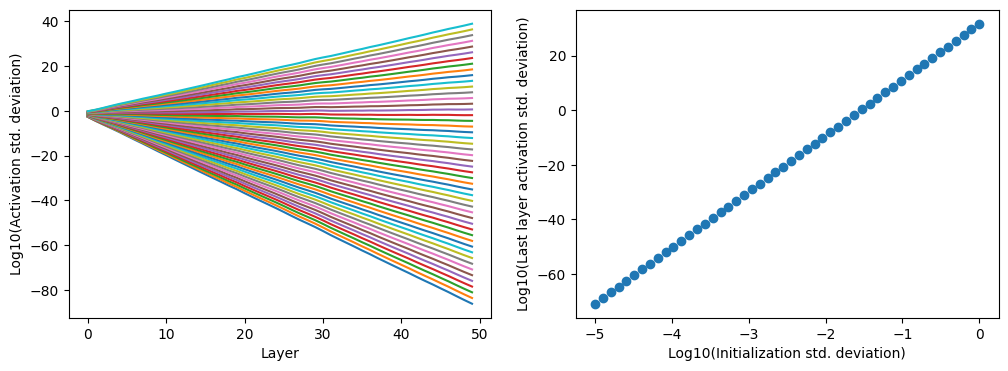

In [17]:
fig, axes = plt.subplots(figsize=(12, 4), ncols=2)

for s in std_devs:    
    axes[0].plot(range(len(s)), np.log10(s))
    axes[0].set_xlabel('Layer')
    axes[0].set_ylabel('Log10(Activation std. deviation)')

last_std = [np.log10(s[-10]) for s in std_devs]
axes[1].scatter(np.log10(sigma_sq_omega_), last_std)
axes[1].set_xlabel('Log10(Initialization std. deviation)')
axes[1].set_ylabel('Log10(Last layer activation std. deviation)')

Now let's define a loss function.  We'll just use the least squares loss function. We'll also write a function to compute dloss_doutput


In [18]:
def least_squares_loss(net_output, y):
  return np.sum((net_output-y) * (net_output-y))

def d_loss_d_output(net_output, y):
    return 2*(net_output -y);

Here's the code for the backward pass

In [19]:
# We'll need the indicator function
def indicator_function(x):
  x_in = np.array(x)
  x_in[x_in>=0] = 1
  x_in[x_in<0] = 0
  return x_in

# Main backward pass routine
def backward_pass(all_weights, all_biases, all_f, all_h, y):
  # Retrieve number of layers
  K = len(all_weights) - 1

  # We'll store the derivatives dl_dweights and dl_dbiases in lists as well
  all_dl_dweights = [None] * (K+1)
  all_dl_dbiases = [None] * (K+1)
  # And we'll store the derivatives of the loss with respect to the activation and preactivations in lists
  all_dl_df = [None] * (K+1)
  all_dl_dh = [None] * (K+1)
  # Again for convenience we'll stick with the convention that all_h[0] is the net input and all_f[k] in the net output

  # Compute derivatives of net output with respect to loss
  all_dl_df[K] = np.array(d_loss_d_output(all_f[K],y))

  # Now work backwards through the network
  for layer in range(K,-1,-1):
    # Calculate the derivatives of biases at layer from all_dl_df[K]. (eq 7.13, line 1)
    all_dl_dbiases[layer] = np.array(all_dl_df[layer])
    # Calculate the derivatives of weight at layer from all_dl_df[K] and all_h[K] (eq 7.13, line 2)
    all_dl_dweights[layer] = np.matmul(all_dl_df[layer], all_h[layer].transpose())

    # Calculate the derivatives of activations from weight and derivatives of next preactivations (eq 7.13, line 3 second part)
    all_dl_dh[layer] = np.matmul(all_weights[layer].transpose(), all_dl_df[layer])
    # Calculate the derivatives of the pre-activation f with respect to activation h (eq 7.13, line 3, first part)
    if layer > 0:
      all_dl_df[layer-1] = indicator_function(all_f[layer-1]) * all_dl_dh[layer]

  return all_dl_dweights, all_dl_dbiases, all_dl_dh, all_dl_df

Now let's look at what happens to the magnitude of the gradients on the way back.

In [20]:
# Number of layers
K = 5
# Number of neurons per layer
D = 8
# Input layer
D_i = 1
# Output layer
D_o = 1
# Set variance of initial weights to 1
sigma_sq_omega = 1.0
# Initialize parameters
all_weights, all_biases = init_params(K,D,sigma_sq_omega)

# For simplicity we'll just consider the gradients of the weights and biases between the first and last hidden layer
n_data = 100
aggregate_dl_df = [None] * (K+1)
for layer in range(1,K):
  # These 3D arrays will store the gradients for every data point
  aggregate_dl_df[layer] = np.zeros((D,n_data))


# We'll have to compute the derivatives of the parameters for each data point separately
for c_data in range(n_data):
  data_in = np.random.normal(size=(1,1))
  y = np.zeros((1,1))
  net_output, all_f, all_h = compute_network_output(data_in, all_weights, all_biases)
  all_dl_dweights, all_dl_dbiases, all_dl_dh, all_dl_df = backward_pass(all_weights, all_biases, all_f, all_h, y)
  for layer in range(1,K):
    aggregate_dl_df[layer][:,c_data] = np.squeeze(all_dl_df[layer])

for layer in range(1,K):
  print("Layer %d, std of dl_dh = %3.3f"%(layer, np.std(aggregate_dl_df[layer].ravel())))


Layer 1, std of dl_dh = 446.654
Layer 2, std of dl_dh = 340.657
Layer 3, std of dl_dh = 109.132
Layer 4, std of dl_dh = 56.472


In [ ]:
# You can see that the gradients of the hidden units are increasing on average (the standard deviation is across all hidden units at the layer
# and the 100 training examples

In [21]:
# TO DO
# Change this to 50 layers with 80 hidden units per layer
# Number of layers
K = 50
# Number of neurons per layer
D = 80
# Input layer
D_i = 1
# Output layer
D_o = 1
# Set variance of initial weights to 1
sigma_sq_omega = 1.0
# Initialize parameters
all_weights, all_biases = init_params(K,D,sigma_sq_omega)

# For simplicity we'll just consider the gradients of the weights and biases between the first and last hidden layer
n_data = 100
aggregate_dl_df = [None] * (K+1)
for layer in range(1,K):
  # These 3D arrays will store the gradients for every data point
  aggregate_dl_df[layer] = np.zeros((D,n_data))


# We'll have to compute the derivatives of the parameters for each data point separately
for c_data in range(n_data):
  data_in = np.random.normal(size=(1,1))
  y = np.zeros((1,1))
  net_output, all_f, all_h = compute_network_output(data_in, all_weights, all_biases)
  all_dl_dweights, all_dl_dbiases, all_dl_dh, all_dl_df = backward_pass(all_weights, all_biases, all_f, all_h, y)
  for layer in range(1,K):
    aggregate_dl_df[layer][:,c_data] = np.squeeze(all_dl_df[layer])

for layer in range(1,K):
  print("Layer %d, std of dl_dh = %3.3f"%(layer, np.std(aggregate_dl_df[layer].ravel())))


Layer 1, std of dl_dh = 3864161615668244381461267510373904423054174106385627368088294218476908925943808.000
Layer 2, std of dl_dh = 644297462740804713442581900026680633808249992732441097572021950434417515167744.000
Layer 3, std of dl_dh = 116256578506420949530034836693026278332620775906201422909563657755039975342080.000
Layer 4, std of dl_dh = 18012406883088290574820624800592506146677260025062386448774316977284251123712.000
Layer 5, std of dl_dh = 2657382923492155237517743551772839757190473680951583847484196418047631687680.000
Layer 6, std of dl_dh = 437115574218245193807908837898776765075349933300781174644617597538000699392.000
Layer 7, std of dl_dh = 72289425689022383694959922502133948966481633180885036698402715526890520576.000
Layer 8, std of dl_dh = 10229045579369877059893160585567011515114230101645934741607603021463683072.000
Layer 9, std of dl_dh = 1622769590787357221165998426801933037786842056906651889376730795250548736.000
Layer 10, std of dl_dh = 291677266860870437780232576190

In [26]:
import tqdm
# TO DO
# Now experiment with sigma_sq_omega to try to stop the variance of the gradients exploding

# Number of layers
K = 50
# Number of neurons per layer
D = 80
# Input layer
D_i = 1
# Output layer
D_o = 1


std_devs = []
sigma_sq_omega_ = np.logspace(-5, 0)

for sigma_sq_omega in tqdm.tqdm(sigma_sq_omega_):
    # Initialize parameters
    all_weights, all_biases = init_params(K,D,sigma_sq_omega)
    
    # For simplicity we'll just consider the gradients of the weights and biases between the first and last hidden layer
    n_data = 100
    aggregate_dl_df = [None] * (K+1)
    for layer in range(1,K):
        # These 3D arrays will store the gradients for every data point
        aggregate_dl_df[layer] = np.zeros((D,n_data))

    # We'll have to compute the derivatives of the parameters for each data point separately
    for c_data in range(n_data):
        data_in = np.random.normal(size=(1,1))
        y = np.zeros((1,1))
        net_output, all_f, all_h = compute_network_output(data_in, all_weights, all_biases)
        all_dl_dweights, all_dl_dbiases, all_dl_dh, all_dl_df = backward_pass(all_weights, all_biases, all_f, all_h, y)
        for layer in range(1,K):
            aggregate_dl_df[layer][:,c_data] = np.squeeze(all_dl_df[layer])

    s_std_devs = []
    for layer in range(1,K):
        s_std_devs.append(np.std(aggregate_dl_df[layer].ravel()))
    std_devs.append(s_std_devs)


100%|████████████████████████████████████████████████████████████████| 50/50 [00:13<00:00,  3.84it/s]


/tmp/ipykernel_413102/1753113928.py:4: RuntimeWarning: divide by zero encountered in log10
  axes[0].plot(range(len(s)), np.log10(s))


Text(0, 0.5, 'Log10(Last layer dl_df std. deviation)')

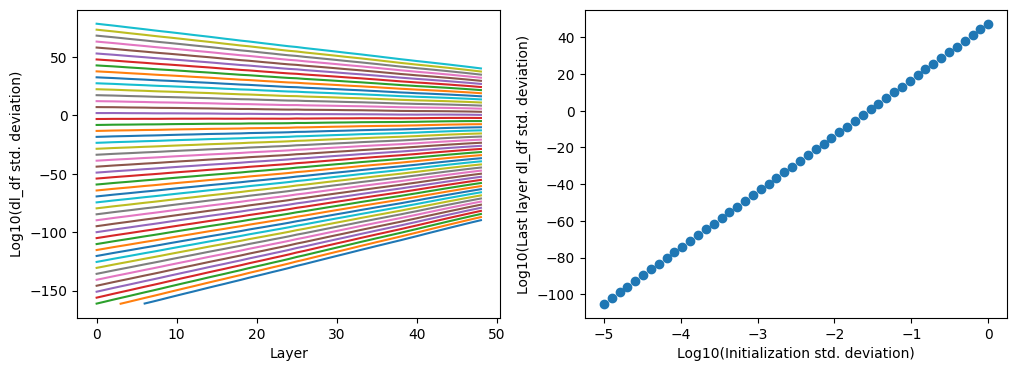

In [28]:
fig, axes = plt.subplots(figsize=(12, 4), ncols=2)

for s in std_devs:    
    axes[0].plot(range(len(s)), np.log10(s))
    axes[0].set_xlabel('Layer')
    axes[0].set_ylabel('Log10(dl_df std. deviation)')

last_std = [np.log10(s[-10]) for s in std_devs]
axes[1].scatter(np.log10(sigma_sq_omega_), last_std)
axes[1].set_xlabel('Log10(Initialization std. deviation)')
axes[1].set_ylabel('Log10(Last layer dl_df std. deviation)')